In [18]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [19]:
# Load the datasets
customers_df = pd.read_csv('/content/Customers.csv')
transactions_df = pd.read_csv('/content/Transactions.csv')

In [20]:
# Basic data exploration
print("\nCustomers Dataset Info:")
print(customers_df.info())
print("\nCustomers Sample:")
print(customers_df.head())

print("\nTransactions Dataset Info:")
print(transactions_df.info())
print("\nTransactions Sample:")
print(transactions_df.head())


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Customers Sample:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------     

In [21]:
# Convert dates to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])


In [22]:
# Basic statistics for customers
print("\nCustomer Distribution by Region:")
print(customers_df['Region'].value_counts())


Customer Distribution by Region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [23]:
# Transaction analysis
customer_metrics = transactions_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

customer_metrics.columns = ['CustomerID', 'TransactionCount', 'TotalSpend', 'TotalItems']


In [24]:
# Merge with customer data
customer_analysis = pd.merge(customers_df, customer_metrics, on='CustomerID', how='left')

In [25]:
# Calculate average transaction value
customer_analysis['AvgTransactionValue'] = customer_analysis['TotalSpend'] / customer_analysis['TransactionCount']

In [26]:
# Regional analysis
regional_metrics = customer_analysis.groupby('Region').agg({
    'CustomerID': 'count',
    'TotalSpend': ['mean', 'sum'],
    'TransactionCount': 'mean'
}).round(2)

print("\nRegional Analysis:")
print(regional_metrics)


Regional Analysis:
              CustomerID TotalSpend            TransactionCount
                   count       mean        sum             mean
Region                                                         
Asia                  45    3456.25  152074.97             4.95
Europe                50    3325.09  166254.63             4.68
North America         46    3311.16  152313.40             5.30
South America         59    3717.84  219352.56             5.15


In [27]:
# Time-based analysis,Monthly signup trend
monthly_signups = customers_df.groupby(customers_df['SignupDate'].dt.to_period('M')).size()


In [28]:
# Monthly transaction trend
monthly_transactions = transactions_df.groupby(
    transactions_df['TransactionDate'].dt.to_period('M')
).agg({
    'TotalValue': 'sum',
    'TransactionID': 'count'
})


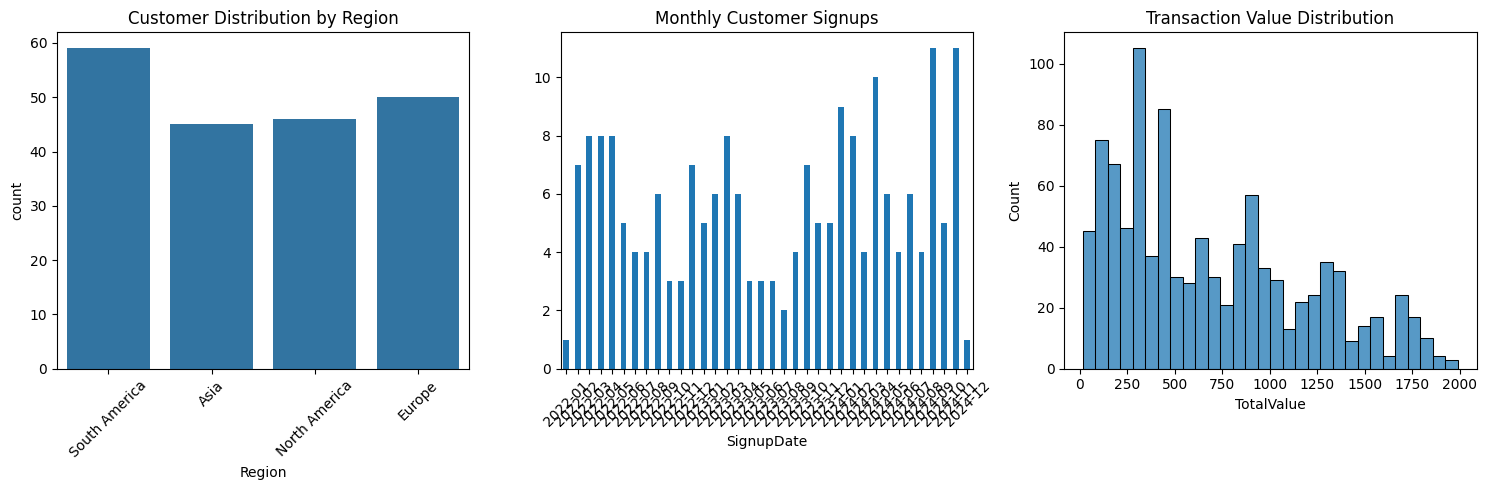

In [29]:
# Visualizations
plt.figure(figsize=(15, 5))

# Plot 1: Customer Distribution by Region
plt.subplot(1, 3, 1)
sns.countplot(data=customers_df, x='Region')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)

# Plot 2: Monthly Signups
plt.subplot(1, 3, 2)
monthly_signups.plot(kind='bar')
plt.title('Monthly Customer Signups')
plt.xticks(rotation=45)

# Plot 3: Transaction Value Distribution
plt.subplot(1, 3, 3)
sns.histplot(data=transactions_df, x='TotalValue', bins=30)
plt.title('Transaction Value Distribution')

plt.tight_layout()
plt.show()

In [30]:
# Calculate key business insights
print("\nKey Business Insights:")

# 1. Customer Activity
print("\n1. Customer Activity Metrics:")
print(f"Total Customers: {len(customers_df)}")
print(f"Active Customers (with transactions): {len(customer_metrics)}")
print(f"Average Transactions per Customer: {customer_metrics['TransactionCount'].mean():.2f}")

# 2. Revenue Metrics
print("\n2. Revenue Metrics:")
print(f"Total Revenue: ${transactions_df['TotalValue'].sum():,.2f}")
print(f"Average Transaction Value: ${transactions_df['TotalValue'].mean():.2f}")

# 3. Regional Performance
print("\n3. Top Performing Region:")
top_region = regional_metrics.sort_values(('TotalSpend', 'sum'), ascending=False).index[0]
print(f"Top Region by Revenue: {top_region}")

# 4. Customer Acquisition Trend
recent_signups = customers_df[customers_df['SignupDate'].dt.year == 2024]['CustomerID'].count()
print(f"\n4. Recent Customer Acquisition:")
print(f"New Customers in 2024: {recent_signups}")

# 5. Purchase Frequency
high_frequency_customers = len(customer_metrics[customer_metrics['TransactionCount'] > 5])
print(f"\n5. High-Frequency Customers:")
print(f"Customers with >5 transactions: {high_frequency_customers}")


Key Business Insights:

1. Customer Activity Metrics:
Total Customers: 200
Active Customers (with transactions): 199
Average Transactions per Customer: 5.03

2. Revenue Metrics:
Total Revenue: $689,995.56
Average Transaction Value: $690.00

3. Top Performing Region:
Top Region by Revenue: South America

4. Recent Customer Acquisition:
New Customers in 2024: 79

5. High-Frequency Customers:
Customers with >5 transactions: 74
